In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df1=pd.read_excel('DAY WISE & HOURLY LOAD.xlsx')
df1.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,DAYWISE MAXIMUM DELHI LOAD(MW),Unnamed: 4,Unnamed: 5,Unnamed: 6,HOURLY LOAD (MW),Unnamed: 8
0,NaN,NaN,NaN,DATE,MW,NaN,NaN,DATE,MW
1,NaN,NaN,NaN,1/1/2017 10:23:55 AM,3536.23877,NaN,NaN,1/1/2017 12:00:00 AM,1815.571045
2,NaN,NaN,NaN,1/2/2017 10:34:49 AM,3639.73877,NaN,NaN,1/1/2017 1:00:00 AM,1576.699585
3,NaN,NaN,NaN,1/3/2017 10:17:36 AM,3673.321289,NaN,NaN,1/1/2017 2:00:00 AM,1428.967896
4,NaN,NaN,NaN,1/4/2017 10:39:03 AM,3898.86084,NaN,NaN,1/1/2017 3:00:00 AM,1356.272705


In [3]:
df2=pd.read_excel('file.xlsx')
df2.head()

,Date,Max Temp (°C),Min Temp (°C),RH 0830\nIST%,RH 1730\nIST%
0,2017-01-01,20.3,9.2,100,80
1,2017-01-02,23.2,9.3,100,82
2,2017-01-03,24.3,9.5,100,77
3,2017-01-04,24.0,8.9,97,66
4,2017-01-05,25.2,10.4,97,71


In [4]:
df3=pd.read_excel('date.xlsx')
df3.head()

,Day,Date,holiday,type
0,Sunday,2017-01-01 00:00:00,New Year's Day,Restricted Holiday
1,Thursday,2017-01-05 00:00:00,Guru Govind Singh's Birthday,Restricted Holiday
2,Saturday,2017-01-14 00:00:00,Makar Sankranti,Restricted Holiday
3,Saturday,2017-01-14 00:00:00,Pongal,Restricted Holiday
4,Thursday,2017-01-26 00:00:00,Republic Day,Gazetted Holiday


In [5]:
df1.drop(df1.columns[[0,1,2,5,6]],axis=1,inplace=True)
df1.head()

,DAYWISE MAXIMUM DELHI LOAD(MW),Unnamed: 4,HOURLY LOAD (MW),Unnamed: 8
0,DATE,MW,DATE,MW
1,1/1/2017 10:23:55 AM,3536.23877,1/1/2017 12:00:00 AM,1815.571045
2,1/2/2017 10:34:49 AM,3639.73877,1/1/2017 1:00:00 AM,1576.699585
3,1/3/2017 10:17:36 AM,3673.321289,1/1/2017 2:00:00 AM,1428.967896
4,1/4/2017 10:39:03 AM,3898.86084,1/1/2017 3:00:00 AM,1356.272705


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35065 entries, 0 to 35064
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DAYWISE MAXIMUM  DELHI LOAD(MW)  1462 non-null   object
 1   Unnamed: 4                       1462 non-null   object
 2   HOURLY LOAD (MW)                 35065 non-null  object
 3   Unnamed: 8                       35065 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [7]:
df_hourly= df1.iloc[1:,2:]
df_hourly.head()

,HOURLY LOAD (MW),Unnamed: 8
1,1/1/2017 12:00:00 AM,1815.571045
2,1/1/2017 1:00:00 AM,1576.699585
3,1/1/2017 2:00:00 AM,1428.967896
4,1/1/2017 3:00:00 AM,1356.272705
5,1/1/2017 4:00:00 AM,1354.029175


In [8]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 1 to 35064
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   HOURLY LOAD (MW)  35064 non-null  object
 1   Unnamed: 8        35064 non-null  object
dtypes: object(2)
memory usage: 548.0+ KB


In [9]:
df_hourly["Date"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.date
df_hourly["time"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.time

<ipython-input-9-e0a3e35830b7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly["Date"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.date
<ipython-input-9-e0a3e35830b7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly["time"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.time


In [10]:
df_hourly.head()


,HOURLY LOAD (MW),Unnamed: 8,Date,time
1,1/1/2017 12:00:00 AM,1815.571045,2017-01-01,00:00:00
2,1/1/2017 1:00:00 AM,1576.699585,2017-01-01,01:00:00
3,1/1/2017 2:00:00 AM,1428.967896,2017-01-01,02:00:00
4,1/1/2017 3:00:00 AM,1356.272705,2017-01-01,03:00:00
5,1/1/2017 4:00:00 AM,1354.029175,2017-01-01,04:00:00


In [11]:
df_hourly.columns=['HOURLY LOAD (MW)','Load','Date','Time']
df_hourly.head()

,HOURLY LOAD (MW),Load,Date,Time
1,1/1/2017 12:00:00 AM,1815.571045,2017-01-01,00:00:00
2,1/1/2017 1:00:00 AM,1576.699585,2017-01-01,01:00:00
3,1/1/2017 2:00:00 AM,1428.967896,2017-01-01,02:00:00
4,1/1/2017 3:00:00 AM,1356.272705,2017-01-01,03:00:00
5,1/1/2017 4:00:00 AM,1354.029175,2017-01-01,04:00:00


In [12]:
df_hourly[df_hourly['Load']==df_hourly['Load'].max()]

,HOURLY LOAD (MW),Load,Date,Time
21905,7/2/2019 4:00:00 PM,7254.402344,2019-07-02,16:00:00


In [13]:
df_hourly[df_hourly['Load']==df_hourly['Load'].min()]

,HOURLY LOAD (MW),Load,Date,Time
1732,3/14/2017 3:00:00 AM,1156.65979,2017-03-14,03:00:00


<ipython-input-14-7aace10d9559>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_hourly['Load'])


<Axes: xlabel='Load', ylabel='Density'>

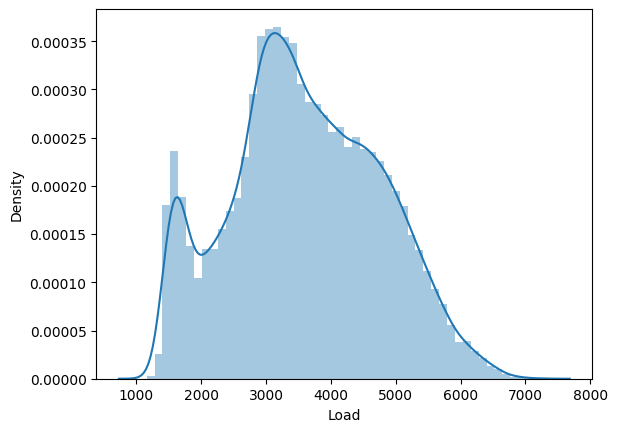

In [14]:
sns.distplot(df_hourly['Load'])

In [15]:
df_hourly["year"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.year

df_hourly["day"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.day

<ipython-input-15-f692355976a5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly["year"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.year
<ipython-input-15-f692355976a5>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly["day"]=pd.to_datetime(df_hourly["HOURLY LOAD (MW)"]).dt.day


In [16]:
df_hourly.head()

,HOURLY LOAD (MW),Load,Date,Time,year,day
1,1/1/2017 12:00:00 AM,1815.571045,2017-01-01,00:00:00,2017,1
2,1/1/2017 1:00:00 AM,1576.699585,2017-01-01,01:00:00,2017,1
3,1/1/2017 2:00:00 AM,1428.967896,2017-01-01,02:00:00,2017,1
4,1/1/2017 3:00:00 AM,1356.272705,2017-01-01,03:00:00,2017,1
5,1/1/2017 4:00:00 AM,1354.029175,2017-01-01,04:00:00,2017,1


In [17]:
df_hourly["year"].unique()


array([2017, 2018, 2019, 2020], dtype=int32)

In [18]:
df_hourly[df_hourly["year"]==2017].nunique()

,0
HOURLY LOAD (MW),8760
Load,8718
Date,365
Time,24
year,1
day,31


<Axes: xlabel='Date', ylabel='Load'>

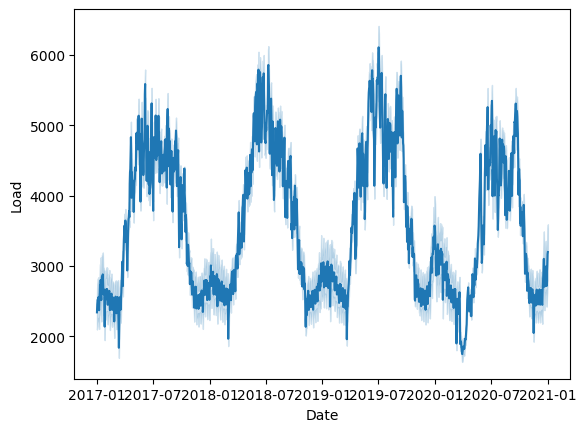

In [19]:
sns.lineplot(x="Date",y="Load",data=df_hourly)

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1095 non-null   datetime64[ns]
 1   Max Temp (°C)  1095 non-null   float64       
 2   Min Temp (°C)  1095 non-null   float64       
 3   RH 0830
IST%   1095 non-null   int64         
 4   RH 1730
IST%   1095 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 42.9 KB


In [21]:
df2['Date'] = df2['Date'].astype(object)

In [22]:
print(df3)

          Day                 Date  \
0      Sunday  2017-01-01 00:00:00   
1    Thursday  2017-01-05 00:00:00   
2    Saturday  2017-01-14 00:00:00   
3    Saturday  2017-01-14 00:00:00   
4    Thursday  2017-01-26 00:00:00   
..        ...                  ...   
190    Friday        20. Nov. 2020   
191   Tuesday        24. Nov. 2020   
192    Monday        25. Nov. 2020   
193  Thursday        24. Dec. 2020   
194    Friday        25. Dec. 2020   

                                            holiday                type  
0                                    New Year's Day  Restricted Holiday  
1                      Guru Govind Singh's Birthday  Restricted Holiday  
2                                   Makar Sankranti  Restricted Holiday  
3                                            Pongal  Restricted Holiday  
4                                      Republic Day    Gazetted Holiday  
..                                              ...                 ...  
190  Pratihar Sashthi or 

In [23]:


merged_df1 = pd.merge(df_hourly, df2, on='Date')

In [24]:
merged_df1.head()

,HOURLY LOAD (MW),Load,Date,Time,year,day,Max Temp (°C),Min Temp (°C),RH 0830\nIST%,RH 1730\nIST%


In [25]:
df_hourly['Date'] = pd.to_datetime(df_hourly['HOURLY LOAD (MW)']).dt.date

# Convert 'date' column in weather dataframe to datetime and extract the date part
df2['Date'] = pd.to_datetime(df2['Date']).dt.date

# Print unique dates from both dataframes to see if they align
print("Unique dates in hourly load data:", df_hourly['Date'].unique())
print("Unique dates in weather data:", df2['Date'].unique())

# Check for missing dates in the weather data
missing_dates = set(df_hourly['Date'].unique()) - set(df2['Date'].unique())
print("Missing dates in weather data:", missing_dates)

# Perform the merge
merged_df = pd.merge(df_hourly, df2, on='Date', how='left')

# After merging, fill any remaining NaN values in weather data (optional)
merged_df.fillna(method='ffill', inplace=True)  # Forward-fill missing weather data

<ipython-input-25-abf8713505a5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_hourly['Date'] = pd.to_datetime(df_hourly['HOURLY LOAD (MW)']).dt.date


Unique dates in hourly load data: [datetime.date(2017, 1, 1) datetime.date(2017, 1, 2)
 datetime.date(2017, 1, 3) ... datetime.date(2020, 12, 29)
 datetime.date(2020, 12, 30) datetime.date(2020, 12, 31)]
Unique dates in weather data: [datetime.date(2017, 1, 1) datetime.date(2017, 1, 2)
 datetime.date(2017, 1, 3) ... datetime.date(2019, 12, 29)
 datetime.date(2019, 12, 30) datetime.date(2019, 12, 31)]
Missing dates in weather data: {datetime.date(2020, 2, 22), datetime.date(2020, 11, 3), datetime.date(2020, 11, 19), datetime.date(2020, 7, 28), datetime.date(2020, 2, 17), datetime.date(2020, 4, 14), datetime.date(2020, 2, 23), datetime.date(2020, 6, 11), datetime.date(2020, 4, 27), datetime.date(2020, 1, 16), datetime.date(2020, 12, 4), datetime.date(2020, 9, 27), datetime.date(2020, 9, 6), datetime.date(2020, 7, 29), datetime.date(2020, 4, 3), datetime.date(2020, 9, 3), datetime.date(2020, 12, 8), datetime.date(2020, 12, 26), datetime.date(2020, 5, 16), datetime.date(2020, 9, 23), datet

<ipython-input-25-abf8713505a5>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)  # Forward-fill missing weather data


In [26]:
print(merged_df)

              HOURLY LOAD (MW)         Load        Date      Time  year  day  \
0         1/1/2017 12:00:00 AM  1815.571045  2017-01-01  00:00:00  2017    1   
1          1/1/2017 1:00:00 AM  1576.699585  2017-01-01  01:00:00  2017    1   
2          1/1/2017 2:00:00 AM  1428.967896  2017-01-01  02:00:00  2017    1   
3          1/1/2017 3:00:00 AM  1356.272705  2017-01-01  03:00:00  2017    1   
4          1/1/2017 4:00:00 AM  1354.029175  2017-01-01  04:00:00  2017    1   
...                        ...          ...         ...       ...   ...  ...   
35059    12/31/2020 7:00:00 PM  3797.245850  2020-12-31  19:00:00  2020   31   
35060    12/31/2020 8:00:00 PM  3576.340820  2020-12-31  20:00:00  2020   31   
35061    12/31/2020 9:00:00 PM  3327.022217  2020-12-31  21:00:00  2020   31   
35062   12/31/2020 10:00:00 PM  3059.243408  2020-12-31  22:00:00  2020   31   
35063   12/31/2020 11:00:00 PM  2695.267578  2020-12-31  23:00:00  2020   31   

       Max Temp (°C)  Min Temp (°C)  RH

In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Day      195 non-null    object
 1   Date     195 non-null    object
 2   holiday  195 non-null    object
 3   type     195 non-null    object
dtypes: object(4)
memory usage: 6.2+ KB


In [28]:
print(df3)

          Day                 Date  \
0      Sunday  2017-01-01 00:00:00   
1    Thursday  2017-01-05 00:00:00   
2    Saturday  2017-01-14 00:00:00   
3    Saturday  2017-01-14 00:00:00   
4    Thursday  2017-01-26 00:00:00   
..        ...                  ...   
190    Friday        20. Nov. 2020   
191   Tuesday        24. Nov. 2020   
192    Monday        25. Nov. 2020   
193  Thursday        24. Dec. 2020   
194    Friday        25. Dec. 2020   

                                            holiday                type  
0                                    New Year's Day  Restricted Holiday  
1                      Guru Govind Singh's Birthday  Restricted Holiday  
2                                   Makar Sankranti  Restricted Holiday  
3                                            Pongal  Restricted Holiday  
4                                      Republic Day    Gazetted Holiday  
..                                              ...                 ...  
190  Pratihar Sashthi or 

In [29]:
df3['Date'] = pd.to_datetime(df3['Date'], format="mixed")

In [30]:
df3['holidays'] = 1

In [31]:
df3.head()

,Day,Date,holiday,type,holidays
0,Sunday,2017-01-01,New Year's Day,Restricted Holiday,1
1,Thursday,2017-01-05,Guru Govind Singh's Birthday,Restricted Holiday,1
2,Saturday,2017-01-14,Makar Sankranti,Restricted Holiday,1
3,Saturday,2017-01-14,Pongal,Restricted Holiday,1
4,Thursday,2017-01-26,Republic Day,Gazetted Holiday,1


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Day       195 non-null    object        
 1   Date      195 non-null    datetime64[ns]
 2   holiday   195 non-null    object        
 3   type      195 non-null    object        
 4   holidays  195 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 7.7+ KB


In [33]:
df3['Date'] = df3['Date'].astype(object)

In [34]:
print(df_hourly['Date'].dtype)  # Should be of type 'datetime64[ns]' or 'object' (if kept as a string)
print(df3['Date'].dtype)      # Should be of type 'datetime64[ns]' or 'object'

# Ensure that both 'date' columns are in datetime format (removing any time component)
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.date
df3['Date'] = pd.to_datetime(df3['Date']).dt.date

# Check unique dates in both dataframes
print("Dates in hourly load data:", merged_df['Date'].unique())
print("Dates in holiday data:", df3['Date'].unique())

# Check for any matching dates
common_dates = set(merged_df['Date']).intersection(set(df3['Date']))
print("Common dates between the two dataframes:", common_dates)

# Merge the holiday data with the load data
df = pd.merge(merged_df, df3[['Date', 'holidays']], on='Date', how='left')

# Replace NaN values in the 'holiday' column with 0 (non-holidays)
df['holidays'] = df['holidays'].fillna(0).astype(int)  # Convert to int to get 0 or 1


object
object
Dates in hourly load data: [datetime.date(2017, 1, 1) datetime.date(2017, 1, 2)
 datetime.date(2017, 1, 3) ... datetime.date(2020, 12, 29)
 datetime.date(2020, 12, 30) datetime.date(2020, 12, 31)]
Dates in holiday data: [datetime.date(2017, 1, 1) datetime.date(2017, 1, 5)
 datetime.date(2017, 1, 14) datetime.date(2017, 1, 26)
 datetime.date(2017, 2, 1) datetime.date(2017, 2, 10)
 datetime.date(2017, 2, 19) datetime.date(2017, 2, 21)
 datetime.date(2017, 2, 24) datetime.date(2017, 3, 12)
 datetime.date(2017, 3, 13) datetime.date(2017, 3, 28)
 datetime.date(2017, 4, 4) datetime.date(2017, 4, 9)
 datetime.date(2017, 4, 11) datetime.date(2017, 4, 13)
 datetime.date(2017, 4, 14) datetime.date(2017, 4, 15)
 datetime.date(2017, 4, 16) datetime.date(2017, 5, 9)
 datetime.date(2017, 5, 10) datetime.date(2017, 6, 23)
 datetime.date(2017, 6, 25) datetime.date(2017, 6, 26)
 datetime.date(2017, 8, 7) datetime.date(2017, 8, 15)
 datetime.date(2017, 8, 17) datetime.date(2017, 8, 25)
 da

In [35]:
print(df)

              HOURLY LOAD (MW)         Load        Date      Time  year  day  \
0         1/1/2017 12:00:00 AM  1815.571045  2017-01-01  00:00:00  2017    1   
1          1/1/2017 1:00:00 AM  1576.699585  2017-01-01  01:00:00  2017    1   
2          1/1/2017 2:00:00 AM  1428.967896  2017-01-01  02:00:00  2017    1   
3          1/1/2017 3:00:00 AM  1356.272705  2017-01-01  03:00:00  2017    1   
4          1/1/2017 4:00:00 AM  1354.029175  2017-01-01  04:00:00  2017    1   
...                        ...          ...         ...       ...   ...  ...   
35371    12/31/2020 7:00:00 PM  3797.245850  2020-12-31  19:00:00  2020   31   
35372    12/31/2020 8:00:00 PM  3576.340820  2020-12-31  20:00:00  2020   31   
35373    12/31/2020 9:00:00 PM  3327.022217  2020-12-31  21:00:00  2020   31   
35374   12/31/2020 10:00:00 PM  3059.243408  2020-12-31  22:00:00  2020   31   
35375   12/31/2020 11:00:00 PM  2695.267578  2020-12-31  23:00:00  2020   31   

       Max Temp (°C)  Min Temp (°C)  RH

In [36]:
df['holidays'].unique()

array([1, 0])

In [37]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['Date', 'Time', 'Max Temp (°C)', 'Min Temp (°C)','RH 0830\nIST%','RH 1730\nIST%', 'holidays']]
y = df['Load']

# Create training (60%), validation (20%), and test (20%) split
train_size = 0.6
val_size = 0.2

train_idx = int(train_size * len(df))
val_idx = int((train_size + val_size) * len(df))

X_train, y_train = X[:train_idx], y[:train_idx]
X_val, y_val = X[train_idx:val_idx], y[train_idx:val_idx]
X_test, y_test = X[val_idx:], y[val_idx:]


In [38]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ensure that 'date' is set as the index and is a datetime object
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define SARIMA model parameters (p, d, q)
sarima_model = sm.tsa.statespace.SARIMAX(df['Load'], order=(1,1,1), seasonal_order=(1,1,1,24), enforce_stationarity=False, enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Forecast using SARIMA
sarima_forecast = sarima_result.predict(start=len(X_train), end=len(X_train) + len(X_val) - 1)

# Evaluate SARIMA performance
sarima_rmse = np.sqrt(mean_squared_error(y_val, sarima_forecast))
sarima_mae = mean_absolute_error(y_val, sarima_forecast)
sarima_r2 = r2_score(y_val, sarima_forecast)

print(f"SARIMA RMSE: {sarima_rmse}, MAE: {sarima_mae}, R2: {sarima_r2}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA RMSE: 88.10886841018316, MAE: 59.175406739331045, R2: 0.9953701349492792


In [41]:
!pip install fbprophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 62.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running set

In [42]:
from fbprophet import Prophet

# Prepare data for Prophet
prophet_df = df.reset_index()[['Date', 'Load']]
prophet_df.columns = ['ds', 'y']

# Train Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_df[:train_idx])

# Forecast using Prophet
future = prophet_model.make_future_dataframe(periods=len(X_val), freq='H')
prophet_forecast = prophet_model.predict(future)

# Extract forecasted values and evaluate
prophet_pred = prophet_forecast['yhat'].iloc[train_idx:train_idx + len(X_val)]
prophet_rmse = np.sqrt(mean_squared_error(y_val, prophet_pred))
prophet_mae = mean_absolute_error(y_val, prophet_pred)
prophet_r2 = r2_score(y_val, prophet_pred)

print(f"Prophet RMSE: {prophet_rmse}, MAE: {prophet_mae}, R2: {prophet_r2}")


ModuleNotFoundError: No module named 'fbprophet'

In [43]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train[['Max Temp (°C)', 'Min Temp (°C)','RH 0830\nIST%','RH 1730\nIST%', 'holidays']], y_train)

# Predict using validation data
rf_pred = rf_model.predict(X_val[['Max Temp (°C)', 'Min Temp (°C)','RH 0830\nIST%','RH 1730\nIST%', 'holidays']])

# Evaluate Random Forest performance
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
rf_mae = mean_absolute_error(y_val, rf_pred)
rf_r2 = r2_score(y_val, rf_pred)

print(f"Random Forest RMSE: {rf_rmse}, MAE: {rf_mae}, R2: {rf_r2}")


Random Forest RMSE: 731.9949742580003, MAE: 605.9466636573623, R2: 0.680445245234706


In [44]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Scale the data for LSTM
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(X_train[['Max Temp (°C)', 'Min Temp (°C)','RH 0830\nIST%','RH 1730\nIST%', 'holidays']])
scaled_val = scaler.transform(X_val[['Max Temp (°C)', 'Min Temp (°C)','RH 0830\nIST%','RH 1730\nIST%', 'holidays']])

# Reshape input to be [samples, time steps, features] for LSTM
X_train_lstm = scaled_train.reshape((scaled_train.shape[0], 1, scaled_train.shape[1]))
X_val_lstm = scaled_val.reshape((scaled_val.shape[0], 1, scaled_val.shape[1]))

# LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val))

# Predict with LSTM
lstm_pred = lstm_model.predict(X_val_lstm)
lstm_pred = scaler.inverse_transform(lstm_pred)  # Inverse scaling

# Evaluate LSTM performance
lstm_rmse = np.sqrt(mean_squared_error(y_val, lstm_pred))
lstm_mae = mean_absolute_error(y_val, lstm_pred)
lstm_r2 = r2_score(y_val, lstm_pred)

print(f"LSTM RMSE: {lstm_rmse}, MAE: {lstm_mae}, R2: {lstm_r2}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 12814404.0000 - val_loss: 8270532.0000
Epoch 2/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4809640.5000 - val_loss: 2385486.0000
Epoch 3/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 1428756.0000 - val_loss: 2009742.8750
Epoch 4/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 835961.6875 - val_loss: 1296159.6250
Epoch 5/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 622071.0625 - val_loss: 959471.5625
Epoch 6/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 528610.0000 - val_loss: 734513.8125
Epoch 7/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 457289.7188 - val_loss: 594759.1875
Epoch 8/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 421358.8438 - val_loss: 548551.9375
Epoch 9/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 413696.1250 - val_loss: 559618.6250
Epoch 10/10
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 403570.2812 - val_loss: 549459.3750
222/222 ━━━━━━━━━━━━━━━━━━━━ 1

ValueError: non-broadcastable output operand with shape (7075,1) doesn't match the broadcast shape (7075,5)

In [39]:
print(df)

                   HOURLY LOAD (MW)         Load      Time  year  day  \
Date                                                                    
2017-01-01     1/1/2017 12:00:00 AM  1815.571045  00:00:00  2017    1   
2017-01-01      1/1/2017 1:00:00 AM  1576.699585  01:00:00  2017    1   
2017-01-01      1/1/2017 2:00:00 AM  1428.967896  02:00:00  2017    1   
2017-01-01      1/1/2017 3:00:00 AM  1356.272705  03:00:00  2017    1   
2017-01-01      1/1/2017 4:00:00 AM  1354.029175  04:00:00  2017    1   
...                             ...          ...       ...   ...  ...   
2020-12-31    12/31/2020 7:00:00 PM  3797.245850  19:00:00  2020   31   
2020-12-31    12/31/2020 8:00:00 PM  3576.340820  20:00:00  2020   31   
2020-12-31    12/31/2020 9:00:00 PM  3327.022217  21:00:00  2020   31   
2020-12-31   12/31/2020 10:00:00 PM  3059.243408  22:00:00  2020   31   
2020-12-31   12/31/2020 11:00:00 PM  2695.267578  23:00:00  2020   31   

            Max Temp (°C)  Min Temp (°C)  RH 0830\